In [46]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression

# sklearn :: evaluation metrics
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict Airbnb prices

# Load the data

In [47]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df_train.shape, df_test.shape)

(51000, 29) (23111, 28)


# Feature Engineering 

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')
                 id     log_price  accommodates     bathrooms      latitude  \
count  5.100000e+04  51000.000000  51000.000000  51000.000000  51000.000000   
mean   1.127396e+07      4.778693      3.153725      1.231814     38.452159   
std    6.071084e+06      0.714838      2.165303      0.577935      3.077453   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.311556e+06      4.304065      2.000000      1.000000     34.128569   
50%    1.

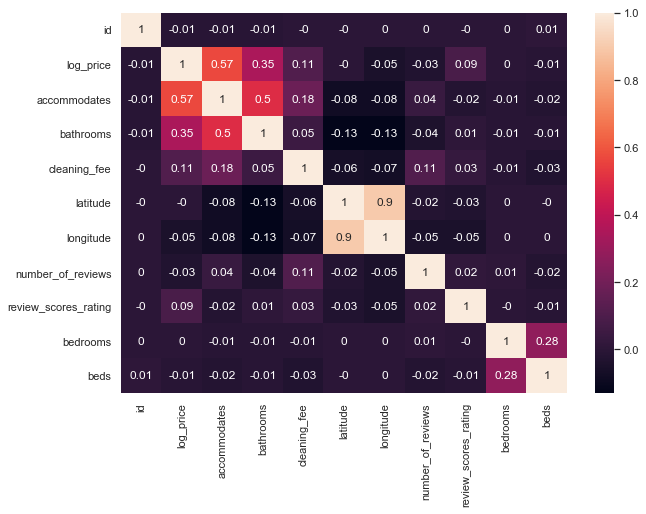

In [48]:
print(df_train.columns)
df_train.head()

#Check the bedrooms based on Bed Type
df_train['bedrooms'] = np.where(df_train['bed_type'].str.contains('Real Bed') & df_train['bedrooms'].isnull(), 1, 0)
df_train['beds'] = np.where(df_train['bed_type'].str.contains('Real Bed') & df_train['beds'].isnull(), 1, 0)


df_test['bedrooms'] = np.where(df_test['bed_type'].str.contains('Real Bed') & df_test['bedrooms'].isnull(), 1, 0)
df_test['beds'] = np.where(df_test['bed_type'].str.contains('Real Bed') & df_test['beds'].isnull(), 1, 0)

## Populate blank fields
df_train['bathrooms'].fillna(1, inplace=True)

df_test['bathrooms'].fillna(1, inplace=True)




#print(df_train.isnull().sum())




#########Added for validations
print(df_train.describe())
print(df_train.count())
# Verify group for any null values
print("")
print("(Number of Blank values)")
print("")
print(df_train.isnull().sum())


print("(---DF_TRAIN---)")
print(df_train.dtypes)
print(df_train.shape)
print(df_train.describe())
print('Corr:',df_train.corr())

print("(---DF_TEST---)")
print(df_test.dtypes)
print(df_test.shape)
print(df_test.describe())
print('Corr:',df_test.corr())


#df_train['zipcode']=df_train['zipcode'].strip()
#print('I am here----------------------------------------------------------------')
#print(df_train['zipcode'])
#print(df_train['zipcode'].str.contains('.0'))
#df_train['zipcode'] = df_train['zipcode'].str.replace('.0','')
#df_train['zipcode'] = df_train['zipcode'].str.replace('\r','')
#df_train['zipcode'] = df_train['zipcode'].str.replace('\n','')

#print('zipcode object')
#print(df_train['zipcode'].dtype)

#df_train['zipcode'] = df_train['zipcode'].str.strip()
#df_train['zipcode'] = df_train['zipcode'].str.replace(' ','').astype(str)
#df_train['zipcode'] = df_train['zipcode'].str.replace('.0','').astype(str)
#df_train['zipcode'] = df_train['zipcode'].str.replace('\r','').astype(str)
#df_train['zipcode'] = df_train['zipcode'].str.replace('\n','').astype(str)

#df_test['zipcode'] = df_test['zipcode'].str.strip()
#df_test['zipcode'] = df_test['zipcode'].str.replace(' ','').astype(str)
#df_test['zipcode'] = df_test['zipcode'].str.replace('.0','').astype(str)
#df_test['zipcode'] = df_test['zipcode'].str.replace('\r','').astype(str)
#df_test['zipcode'] = df_test['zipcode'].str.replace('\n','').astype(str)

#df_train['zipcode']=df_train['zipcode'].str.strip()
#print(df_train['zipcode'])


sns.set(rc={'figure.figsize':(10,7)})
correlation_matrix = df_train.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [49]:

#Keyerror not in index
#df_zipcode = pd.get_dummies(df_train['zipcode'])
#df_train = pd.concat([df_train, df_zipcode], axis=1)

df_room_type = pd.get_dummies(df_train['room_type'])
df_train = pd.concat([df_train, df_room_type], axis=1)

df_city = pd.get_dummies(df_train['city'])
df_train = pd.concat([df_train, df_city], axis=1)

#df_neigh = pd.get_dummies(df_train['neighbourhood'])
#df_train = pd.concat([df_train, df_neigh], axis=1)


##############TEST


#df_zipcode = pd.get_dummies(df_test['zipcode'])
#df_test = pd.concat([df_test, df_zipcode], axis=1)

df_room_type = pd.get_dummies(df_test['room_type'])
df_test = pd.concat([df_test, df_room_type], axis=1)

df_city = pd.get_dummies(df_test['city'])
df_test = pd.concat([df_test, df_city], axis=1)

#Keyerror not in index?
#df_neigh = pd.get_dummies(df_test['neighbourhood'])
#df_test = pd.concat([df_test, df_neigh], axis=1)


#df_train.head()
#df_test.head()


In [50]:

#Validate neighbourhood
#np.where(df_train['neighbourhood'])
#print(np.where(df_train['neighbourhood'].str.contains('md'))

#print(df_train.neighbourhood.str.contains("'"))
#df_train['neighbourhood'].fillna(1, inplace=True)




#print(df_train['zipcode'])

#df_train['zipcode'].fillna('00000', inplace = True)

#df_train['zipcode']=df_train['zipcode'].str.strip()
#print(df_train['zipcode'].dtype)



In [51]:
#Try to retrieve amenities
#df_kitchen = df_train.loc[df_train['amenities'].str.contains('Kitchen')]

#print(df_kitchen)

#df_train['review_scores_rating'] = np.where(df_train['number_of_reviews'] == 0,0)
#df_train['review_scores_rating'] = np.where(df_train['number_of_reviews'] == 0, 0, 1)

# IF NUmber of reviews is 0 Then 0% rating
df_train['review_scores_rating'] = np.where(df_train['number_of_reviews']==0, 0, df_train['review_scores_rating'])
#print(df_train['review_scores_rating'])
#print(df_train['review_scores_rating'].isnull().sum())


#df_train['review_scores_rating'].fillna(1, inplace=True)

#f['Amenities_2'] = np.where(df_train['amenities'].str.contains('Kitchen'),1)

#If kitchen exists retrieve
# df_train['Amenities_2'] = np.where(df_train['amenities'].str.contains('Kitchen'), 1, 0)
# print(df_train['Amenities_2'])
# print(df_train.describe())

df_train['Kitchen'] = np.where(df_train['amenities'].str.contains('Kitchen'), 'Yes', 'No')
df_kitchen = pd.get_dummies(df_train['Kitchen'])
df_train = pd.concat([df_train, df_kitchen], axis=1)
#df_train.head()
#print(df_train['Kitchen'])
#print(df_train.describe())


#Air Conditioning
#df_train['AC'] = np.where(df_train['amenities'].str.contains('Air cond'), 'Yes', 'No')
#df_ac = pd.get_dummies(df_train['AC'])
#df_train = pd.concat([df_train, df_ac], axis=1)
#df_train.head()
#print(df_train['AC'])
#print(df_train.describe())


#TV
# Error at Prepare Submission
# ValueError: shapes (23111,22) and (30,1) not aligned: 22 (dim 1) != 30 (dim 0)
#df_train['TV'] = np.where(df_train['amenities'].str.contains('TV'), 'Yes', 'No')
#df_tv = pd.get_dummies(df_train['TV'])
#df_train = pd.concat([df_train, df_tv], axis=1)

#print("(Number of Blank values)")
#print("")
#print(df_train.isnull().sum())

###### TEST
df_test['Kitchen'] = np.where(df_test['amenities'].str.contains('Kitchen'), 'Yes', 'No')
df_kitchen = pd.get_dummies(df_test['Kitchen'])
df_test = pd.concat([df_test, df_kitchen], axis=1)
#df_test.head()
#print(df_test['Kitchen'])
#print(df_test.describe())


#Air Conditioning
#Prepare Submission get error
# ValueError: shapes (23111,21) and (29,1) not aligned: 21 (dim 1) != 29 (dim 0)
#df_test['AC'] = np.where(df_test['amenities'].str.contains('Air cond'), 'Yes', 'No')
#df_ac = pd.get_dummies(df_test['AC'])
#df_test = pd.concat([df_test, df_ac], axis=1)
#df_test.head()
#print(df_test['AC'])
#print(df_test.describe())


#TV
#df_test['TV'] = np.where(df_test['amenities'].str.contains('TV'), 'Yes', 'No')
#df_tv = pd.get_dummies(df_test['TV'])
#df_test = pd.concat([df_test, df_tv], axis=1)


#print("(Number of Blank values)")
#print("")
#print(df_test.isnull().sum())

In [52]:

X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds']+ list(df_room_type.columns) + list(df_city.columns) + list(df_kitchen.columns) #+ list(df_neigh.columns) #+ list(df_ac.columns)#+ list(df_zipcode.columns) #+ list(df_tv.columns) 
y_column = ['log_price']

In [53]:
# handle missing values
df_train = df_train[X_columns + y_column]
print(df_train.shape)
df_train = df_train.fillna(0.0) # probably not a good idea for 'review_scores_rating'
print(df_train.shape)

(51000, 16)
(51000, 16)


# Model Training

In [54]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)




X_train (40800, 15)
y_train (40800, 1)
X_test (10200, 15)
y_test (10200, 1)


In [55]:
# train a linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation

RMSE 0.49


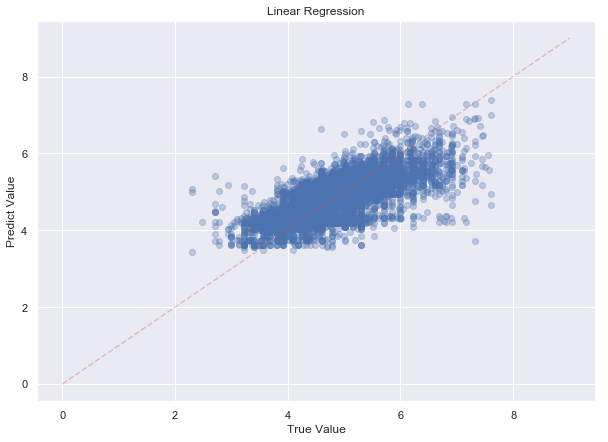

In [56]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

# Prepare submission

In [57]:
#print(X_columns)

df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

,id,log_price
0,986942,4.317993
1,16436737,4.665771
2,18209634,4.224487
3,15027024,4.317993
4,18074243,5.306030
5,8446914,5.249268
6,19362916,4.277832
7,16116059,5.504150
8,20912583,4.178711
9,13573101,4.979736


In [13]:
df_test[['id', 'log_price']].to_csv('submission_linear_regression.csv', index=False)